<a href="https://colab.research.google.com/github/err-aki/formation_pytorch/blob/main/Copy_of_4_A_la_de%CC%81couverte_de_Pytorch_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A la découverte de Pytorch


Dans ce notebook, vous allez découvrir [PyTorch](http://pytorch.org/), une bibliothèque développée par Facebook pour l’entraînement de modèles de deep learning. PyTorch permet d’entraîner des modèles de manière simple et efficace sur des GPUs. L’une des forces de PyTorch est sa gestion intuitive des arrays, comparable à celle de [numpy](https://numpy.org/doc/stable/contents.html).

## Importation de PyTorch

Première étape simple mais importante c'est d'importation la librairie.

In [ ]:
import torch

Par la suite nous allons aussi utiliser numpy.

In [ ]:
import numpy as np

Par la suite on va utiliser des nombres alétoires, afin de contrôler cet aléatoire nous allons initialiser une seed.

In [ ]:
torch.manual_seed(123)

In [ ]:
np.random.seed(123)

## Vecteur, matrice, tenseur

En utilisant PyTorch pour entraîner des modèles de deep learning, vous manipulerez un ensemble d’opérations d’algèbre linéaire sur des tenseurs. Un tenseur à une dimension est appelé vecteur, un à deux dimensions est une matrice, et toute structure avec trois dimensions ou plus est simplement désignée comme un tenseur.

Les tenseurs sont les structures de données fondamentales des réseaux neuronaux, et PyTorch est conçu autour de ces objets mathématiques.

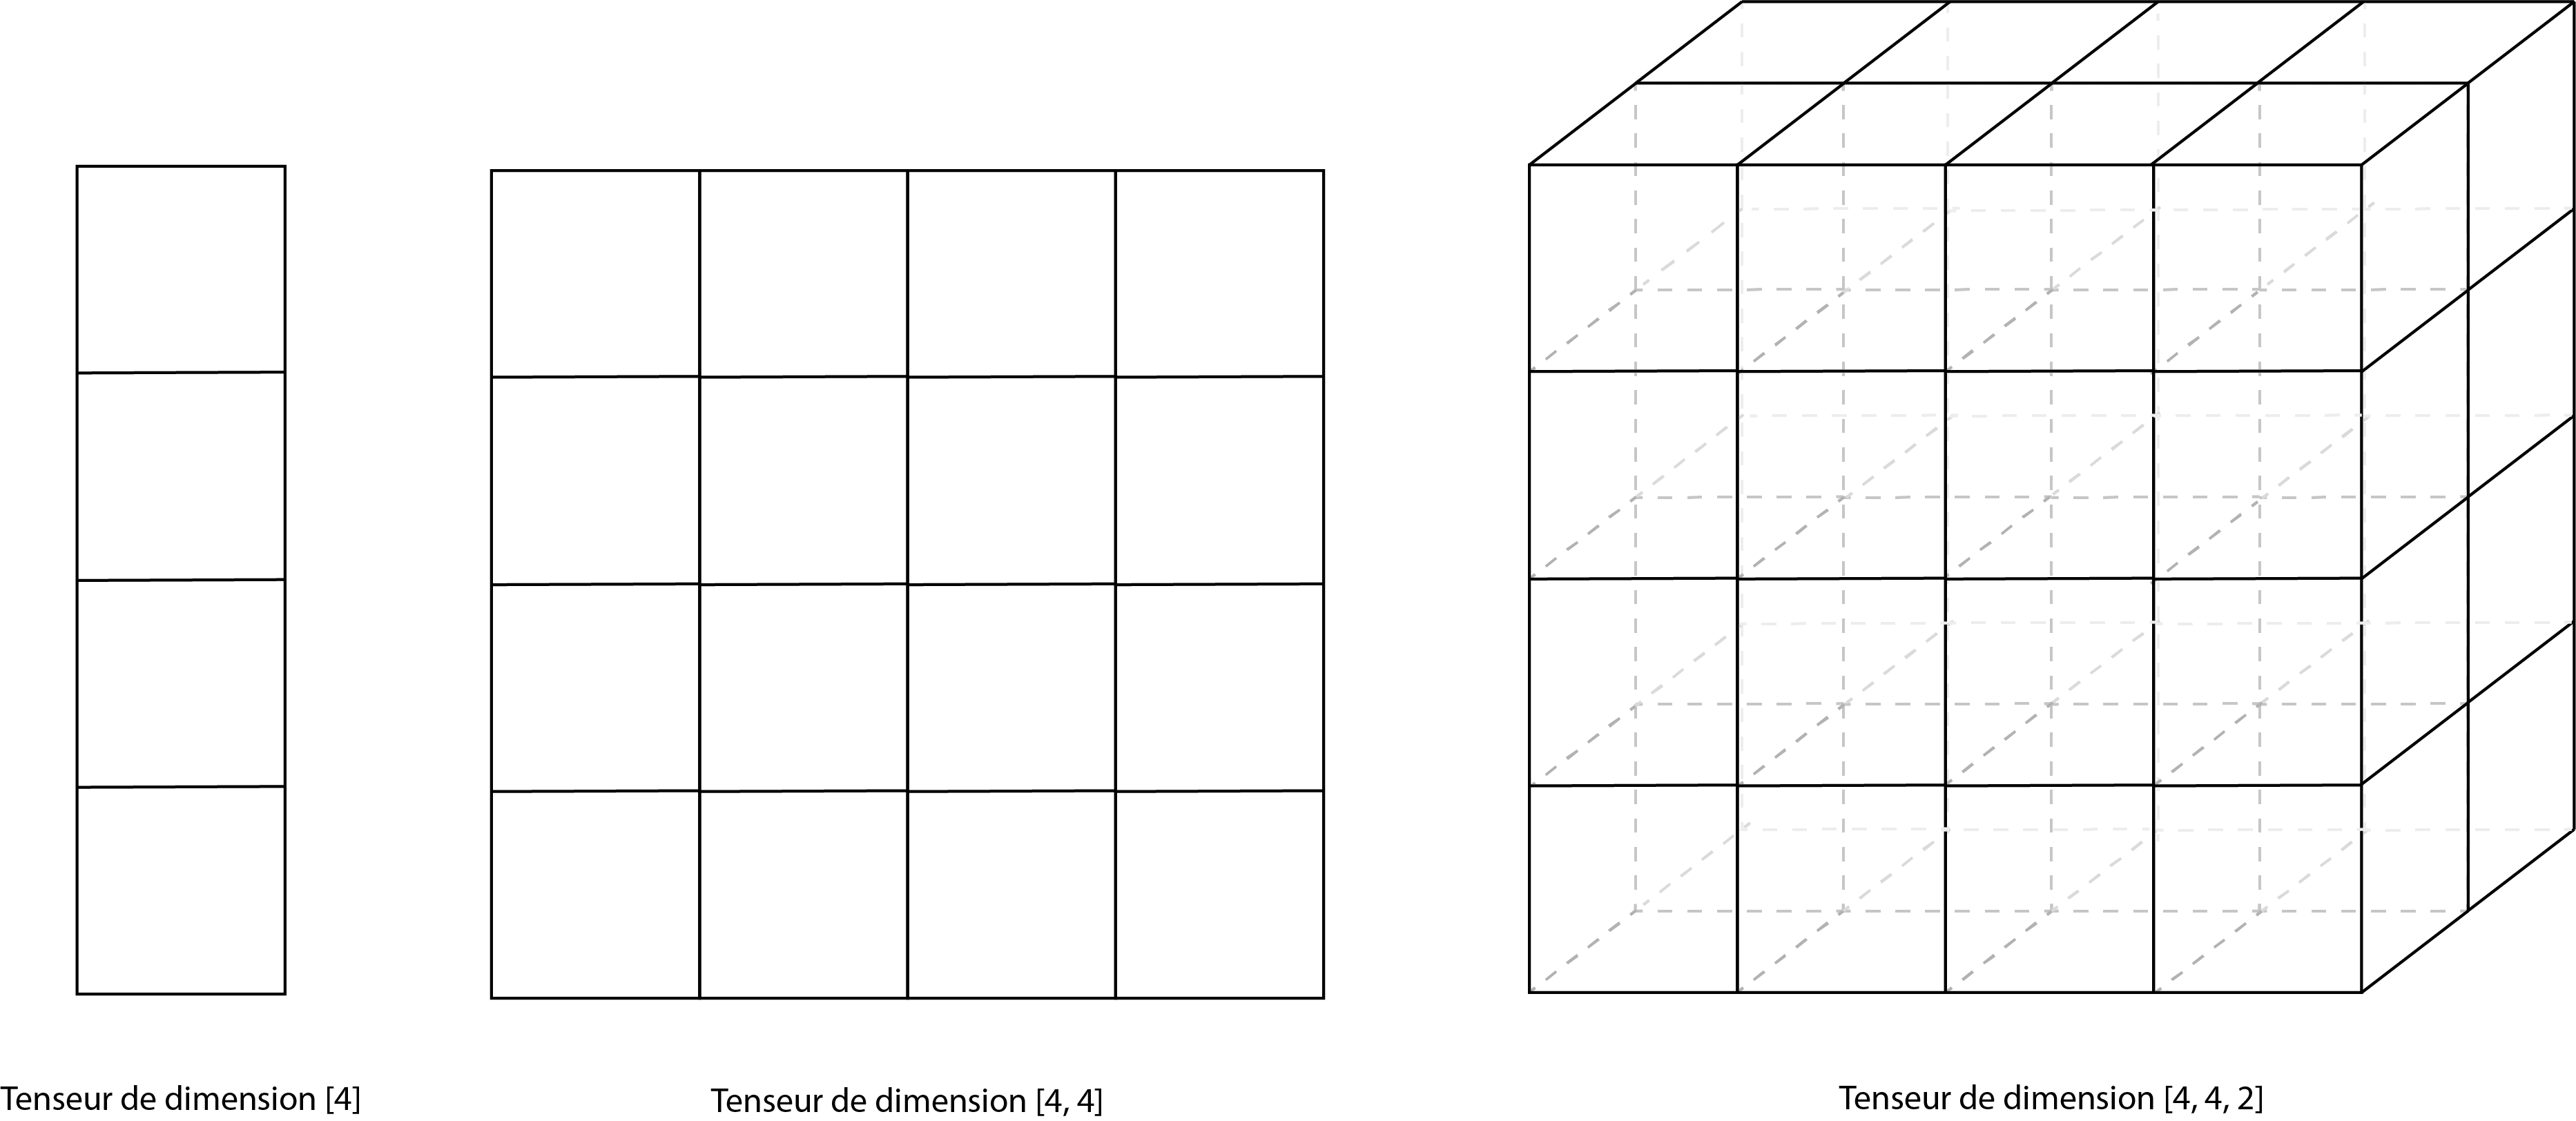

En utilisant la fonction `zeros`, initialisons un vecteur de taille 5 contenant le chiffre 0.

In [ ]:
torch.zeros(5)

tensor([0., 0., 0., 0., 0.])

En utilisant la fonction `ones`, initialisons une matrice de dimension [2, 3] contenant uniquement des 1.

In [ ]:
torch.ones([2, 3])

tensor([[1., 1., 1.],
        [1., 1., 1.]])

En utilisant la fonction `full`, initialisons un tensor de dimension [4, 4, 4] contenant uniquement des 9.

In [ ]:
torch.full([4, 4, 4], 9)

tensor([[[9, 9, 9, 9],
         [9, 9, 9, 9],
         [9, 9, 9, 9],
         [9, 9, 9, 9]],

        [[9, 9, 9, 9],
         [9, 9, 9, 9],
         [9, 9, 9, 9],
         [9, 9, 9, 9]],

        [[9, 9, 9, 9],
         [9, 9, 9, 9],
         [9, 9, 9, 9],
         [9, 9, 9, 9]],

        [[9, 9, 9, 9],
         [9, 9, 9, 9],
         [9, 9, 9, 9],
         [9, 9, 9, 9]]])

Il n'est pas toujours intéressant de créer des vecteurs avec des valeurs unique. Nous allons donc utiliser la fonction `randn` pour initiliser avec des valeurs aléatoires un vecteur, une matrice et un tenseur.

In [ ]:
torch.randn([2])

tensor([-0.1115,  0.1204])

In [ ]:
torch.randn([2, 2])

tensor([[-0.3696, -0.2404],
        [-1.1969,  0.2093]])

In [ ]:
torch.randn([2, 2, 2])

tensor([[[-0.9724, -0.7550],
         [ 0.3239, -0.1085]],

        [[ 0.2103, -0.3908],
         [ 0.2350,  0.6653]]])

## De Torch à Numpy

Il est parfois utile de convertir les formats de données entre PyTorch et Numpy.

Heureusement, PyTorch rend cette transition très facile.

Initialisons une matrice de nombre aléatoire avec pour dimension [4, 4] et stockons la dans *mat1*.

In [ ]:
mat1 = np.random.rand(4,4)
mat1

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477],
       [0.71946897, 0.42310646, 0.9807642 , 0.68482974],
       [0.4809319 , 0.39211752, 0.34317802, 0.72904971],
       [0.43857224, 0.0596779 , 0.39804426, 0.73799541]])

On peut passer très facilement de Numpy à PyTorch en utilisant la fonction `from_numpy`.

In [ ]:
mat2 = torch.from_numpy(mat1)
mat2

tensor([[0.6965, 0.2861, 0.2269, 0.5513],
        [0.7195, 0.4231, 0.9808, 0.6848],
        [0.4809, 0.3921, 0.3432, 0.7290],
        [0.4386, 0.0597, 0.3980, 0.7380]], dtype=torch.float64)

On peut utiliser la fonction `numpy()` pour transformer notre objet PyTorch à Numpy.

Stockons notre matrice numpy dans *mat2*.

In [ ]:
mat2.numpy()

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477],
       [0.71946897, 0.42310646, 0.9807642 , 0.68482974],
       [0.4809319 , 0.39211752, 0.34317802, 0.72904971],
       [0.43857224, 0.0596779 , 0.39804426, 0.73799541]])

**Attention !** : en créant *mat2*, on ne crée pas réellement un nouvel objet, mais on partage la même zone de mémoire que la variable *mat1*.

Ainsi, toute modification de *mat2* se répercutera également dans *mat1*.

In [ ]:
mat1

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477],
       [0.71946897, 0.42310646, 0.9807642 , 0.68482974],
       [0.4809319 , 0.39211752, 0.34317802, 0.72904971],
       [0.43857224, 0.0596779 , 0.39804426, 0.73799541]])

In [ ]:
mat2

tensor([[0.6965, 0.2861, 0.2269, 0.5513],
        [0.7195, 0.4231, 0.9808, 0.6848],
        [0.4809, 0.3921, 0.3432, 0.7290],
        [0.4386, 0.0597, 0.3980, 0.7380]], dtype=torch.float64)

Les matrices sont bien égales.

In [ ]:
mat2 += 1
mat2

tensor([[1.6965, 1.2861, 1.2269, 1.5513],
        [1.7195, 1.4231, 1.9808, 1.6848],
        [1.4809, 1.3921, 1.3432, 1.7290],
        [1.4386, 1.0597, 1.3980, 1.7380]], dtype=torch.float64)

In [ ]:
mat1

array([[1.69646919, 1.28613933, 1.22685145, 1.55131477],
       [1.71946897, 1.42310646, 1.9807642 , 1.68482974],
       [1.4809319 , 1.39211752, 1.34317802, 1.72904971],
       [1.43857224, 1.0596779 , 1.39804426, 1.73799541]])

On voit qu'en modifiant la matrice PyTorch *mat2* cela à changer également notre matrice Numpy *mat1*.

Pour éviter ça, on peut utiliser le fonction `clone` de PyTorch

In [ ]:
mat1 = np.random.rand(4,4)
mat1

array([[0.18249173, 0.17545176, 0.53155137, 0.53182759],
       [0.63440096, 0.84943179, 0.72445532, 0.61102351],
       [0.72244338, 0.32295891, 0.36178866, 0.22826323],
       [0.29371405, 0.63097612, 0.09210494, 0.43370117]])

In [ ]:
mat2 = torch.clone(torch.from_numpy(mat1))
mat2

tensor([[0.1825, 0.1755, 0.5316, 0.5318],
        [0.6344, 0.8494, 0.7245, 0.6110],
        [0.7224, 0.3230, 0.3618, 0.2283],
        [0.2937, 0.6310, 0.0921, 0.4337]], dtype=torch.float64)

In [ ]:
mat2 += 1
mat2

tensor([[1.1825, 1.1755, 1.5316, 1.5318],
        [1.6344, 1.8494, 1.7245, 1.6110],
        [1.7224, 1.3230, 1.3618, 1.2283],
        [1.2937, 1.6310, 1.0921, 1.4337]], dtype=torch.float64)

In [ ]:
mat1

array([[0.18249173, 0.17545176, 0.53155137, 0.53182759],
       [0.63440096, 0.84943179, 0.72445532, 0.61102351],
       [0.72244338, 0.32295891, 0.36178866, 0.22826323],
       [0.29371405, 0.63097612, 0.09210494, 0.43370117]])

Maintenant, les changements appliqués sur la matrice *mat2* n'ont plus d'incidence sur la matrice *mat1*.

## Multiplication, division, addition soustaction

Je ne vais pas vour apprendre à faire des addications, soustraction, division ou des multiplications ici.

Je vais seulement vous rappeler que PyTorch supporte le broadcasting.

Si vous ne savez pas ce qu'est le broacasting, c'est ce que l'on a fait juste audessus via cette ligne `mat2 += 1`.

Il n'est pas possible d'ajouter une valeur à une matrice, on ne peut d'additionner deux matrices de même dimensions.

Ici PyTorch va créer pour vous une matrice de 1 de même dimension que *mat2* pour effectuer l'addition.

C'est ça le broadcasting !

In [ ]:
torch.add(mat2, torch.tensor([1]))

tensor([[2.1825, 2.1755, 2.5316, 2.5318],
        [2.6344, 2.8494, 2.7245, 2.6110],
        [2.7224, 2.3230, 2.3618, 2.2283],
        [2.2937, 2.6310, 2.0921, 2.4337]], dtype=torch.float64)

On peut aussi utiliser *+*, *-*, */* et *\** au lieu de `torch.add`, `torch.subtract`, `torch.divide` and `torch.mul`.

In [ ]:
mat2 + torch.tensor([1])

tensor([[2.1825, 2.1755, 2.5316, 2.5318],
        [2.6344, 2.8494, 2.7245, 2.6110],
        [2.7224, 2.3230, 2.3618, 2.2283],
        [2.2937, 2.6310, 2.0921, 2.4337]], dtype=torch.float64)

On peut aussi additioner un vecteur qui à la même longueur d'une des dimensions de la matrice. Le broadcasting va créer automatiquement pour l'addition la matrice ci-dessous :

`[[1, 2, 3, 4],
  [1, 2, 3, 4],
  [1, 2, 3, 4],
  [1, 2, 3, 4]]`

In [ ]:
mat2 + torch.tensor([1, 2, 3, 4])

tensor([[2.1825, 3.1755, 4.5316, 5.5318],
        [2.6344, 3.8494, 4.7245, 5.6110],
        [2.7224, 3.3230, 4.3618, 5.2283],
        [2.2937, 3.6310, 4.0921, 5.4337]], dtype=torch.float64)

**Attention !** : Il ne faut pas confondre la multiplication élément par élément (ou element-wise) avec la multiplication matricielle.

Il faudra utiliser la fonction `torch.mm` ou `torch.matmul` pour effectuer une multiplication matricielle.

In [ ]:
mat2.shape

torch.Size([4, 4])

In [ ]:
mat3 = torch.randn([4,3], dtype=torch.float64)

In [ ]:
torch.matmul(mat2, mat3)

tensor([[-2.0316,  1.3039, -1.7687],
        [-2.5453,  1.6245, -2.1812],
        [-1.6967,  1.8098, -1.6625],
        [-2.2962,  0.6670, -1.7566]], dtype=torch.float64)

In [ ]:
torch.mm(mat2, mat3)

tensor([[-2.0316,  1.3039, -1.7687],
        [-2.5453,  1.6245, -2.1812],
        [-1.6967,  1.8098, -1.6625],
        [-2.2962,  0.6670, -1.7566]], dtype=torch.float64)

## Implémenter votre première fonction avec PyTorch

L’objectif de cette section est d’utiliser les tenseurs abordés précédemment pour implémenter une régression linéaire.

Pas d’inquiétude si la notion de régression linéaire n’est plus très claire : nous la reverrons dans les prochains notebooks. Ici, l’idée est simplement de se familiariser avec l’utilisation de PyTorch.

Commencez par effectuer une multiplication matricielle, suivie d’une addition matricielle en utilisant PyTorch. Ensuite, appliquez une fonction sur le résultat pour éliminer les valeurs négatives.

Le schéma ci-dessous pourra vous guider.

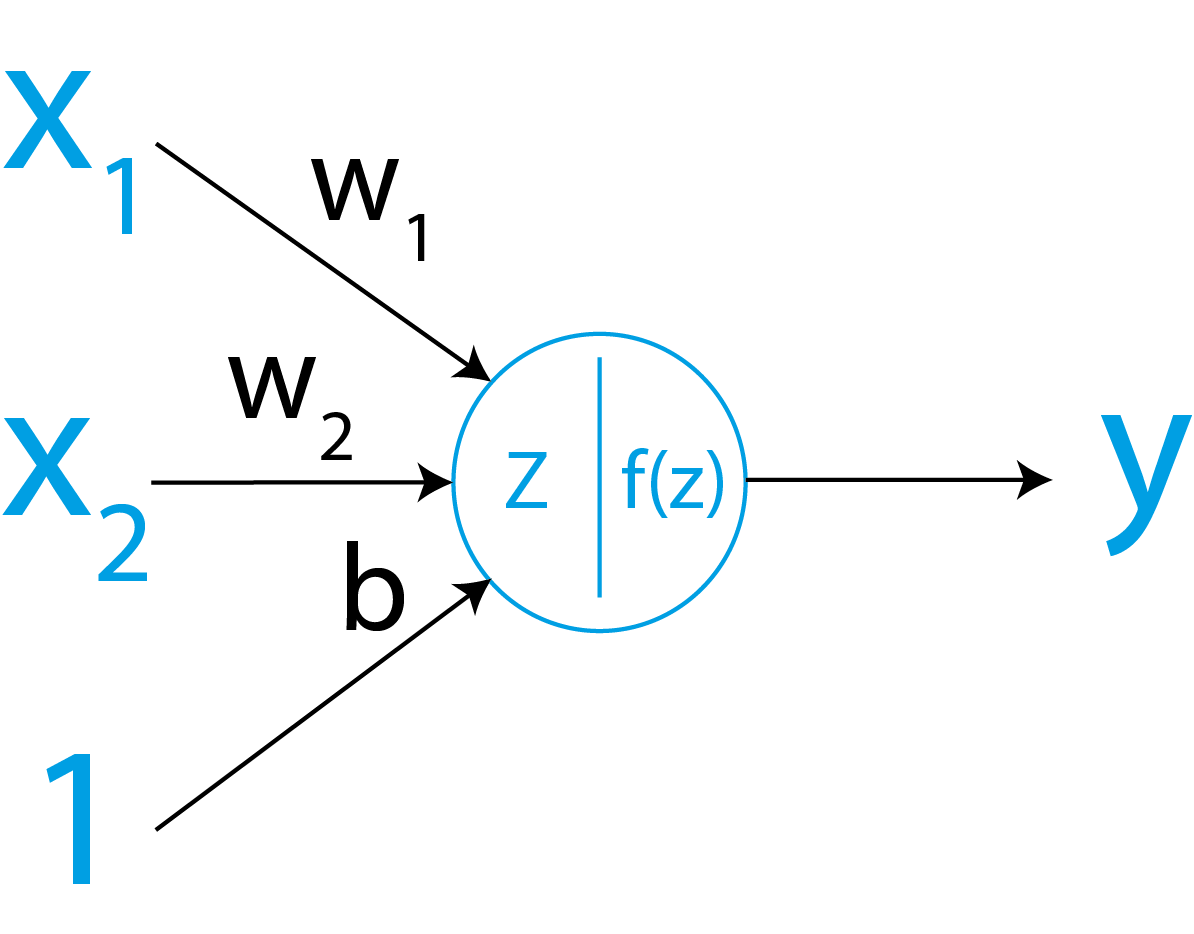

### Génération des données

Dans cette première étape vous allez générer des matrices des données.

Ces données n'ont pas beaucoup d'intérêt, l'objectif est seulement de pouvoir tester vos futurs fonctions.

Vous allez générer une matrices aléatoire d'une dimension de 100 par 4.

Utiliser la fonction **randn** de Pytorch.

In [ ]:
data = torch.randn([100, 4])

Vous allez initialiser aléatoirement une deuxième matrice que l'on va nommer *weights* de 4 par 1.

Utiliser la fonction **randn** de Pytorch.

In [ ]:
weights = torch.randn([4, 1])

Pour finir, initialisez un scalaire à 0 avec la dimension 1 par 1.

Utiliser la fonction **zeros** de Pytorch.

In [ ]:
bias = torch.zeros([1, 1])

### Implémentation des fonctions

#### La régression linéaire

Utiliser vos nouvelles connaissances en Pytorch pour créer une fonction nommé *linear_regression* qui va appliquer une multiplication matricielle entre *x* et *w* puis qui va additioner le résultats avec *b*.

$$ y = x.w+b$$

Vous pouvez utiliser la fonction **matmul** ou **mm** pour appliquer une multiplication matricielle avec Pytorch.

Vous pouvez utiliser la fonction **add** pour appliquer une addition matricielle avec Pytorch.

In [ ]:
def linear_regression(x: torch.Tensor, w: torch.Tensor, b:torch.Tensor) -> torch.Tensor:
  ''' This function applies a linear regression.
      It first applies a matrix multiplication between x and w.
      Then it applies a matrix multiplication between the previous result and b.
  '''

  ### Start of your code ###
  matrice_multiplication = torch.matmul(x,
                                     w)
  matrice_addition = torch.add(matrice_multiplication,
                            b)
  ### End of your code ###

  return matrice_addition

Test de la fonction.

In [ ]:
z = linear_regression(data, weights, bias)

In [ ]:
z.shape

torch.Size([100, 1])

Z devrait avoir une dimension de [100, 1].

#### La fonction get_max

L'objectif de la fonction *get_max* est d'obtenir seulement des valeurs positives.

$$ g(x) = max(0,x)$$


Tips : Utilisez la fonction `torch.maximum` de Pytorch, voir la [doc](https://pytorch.org/docs/stable/generated/torch.maximum.html).

In [ ]:
def get_max(x:torch.Tensor)->torch.Tensor:
    """ The get_max function allows to get only positive values.
  The negative values are replaced by 0.

        Arguments
        ---------
        x: torch.Tensor

        Outpus
        ---------
        y: torch.Tensor
    """

    return torch.maximum(x, torch.zeros(x.shape))

Appliquons maintenant notre fonction *get_max* à notre vecteur *z* et stockons la valeur dans *prediction*.

Test de la fonction.

In [ ]:
prediction = get_max(z)

In [ ]:
np.all(prediction.numpy() >= 0)

True

Le resultat du test devrait être *True*.